In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib

In [17]:
data = pd.read_csv("facpolviews.csv")
data = data.rename(columns={"Which political party do you most align with?":"party","Who do you think should be the next presidential candidate?":"demCand", "Other Comments?" : "ocD", "Do you support the Trump administration?":"Trump","Other Comments?.1":"ocR" })
data = data.drop(columns={"Timestamp"})

In [18]:
data["party"][4] = "Independent"
data["party"][28] = "Independent"
data["party"][33] = "Independent"
data["party"][38] = "Independent"
data["party"][40] = "Independent"
data["party"][44] = "Independent"
data["party"][48] = "Independent"
data["party"][49] = "Independent" # this one is technically unenrolled

In [19]:
data["demCand"][5]="Amy Klobuchar"
data["demCand"][19]="Cory Booker"
data["demCand"][22]="Alexandria Ocasio-Cortez"
data["demCand"][28]="Undecided" #this one said "whomever becomes the nominee to run against Trump" before
data["demCand"][29]="Deval Patrick"
data["demCand"][30]="Cory Booker"
data["demCand"][36]="Michael Bloomberg"
data["demCand"][40]="Undecided"
data["demCand"][45]="Undecided"
data["demCand"][46]="Undecided"
data["demCand"][49]="Michael Bloomberg"

In [20]:
minidat = data.set_index(["party", "ocR","ocD"]).count(level="party")
numDems = minidat['demCand'][0]
numReps = minidat['Trump'][2]
numInds = minidat['demCand'][1]

trump = data.set_index(["Trump", "ocR","ocD"]).count(level="Trump")
trump['party'][0]=trump['party'][0]-1 # accounting for the independent who voted

minidata = data.set_index(["demCand", "ocR","ocD"]).count(level="demCand")
aoc = minidata['party'][0]
ak = minidata['party'][1]
bs = minidata['party'][2]
cb = minidata['party'][3]
dp = minidata['party'][4]
ew = minidata['party'][5]
jb = minidata['party'][6]
mb = minidata['party'][7]
pb = minidata['party'][8]
undecided = minidata['party'][9]

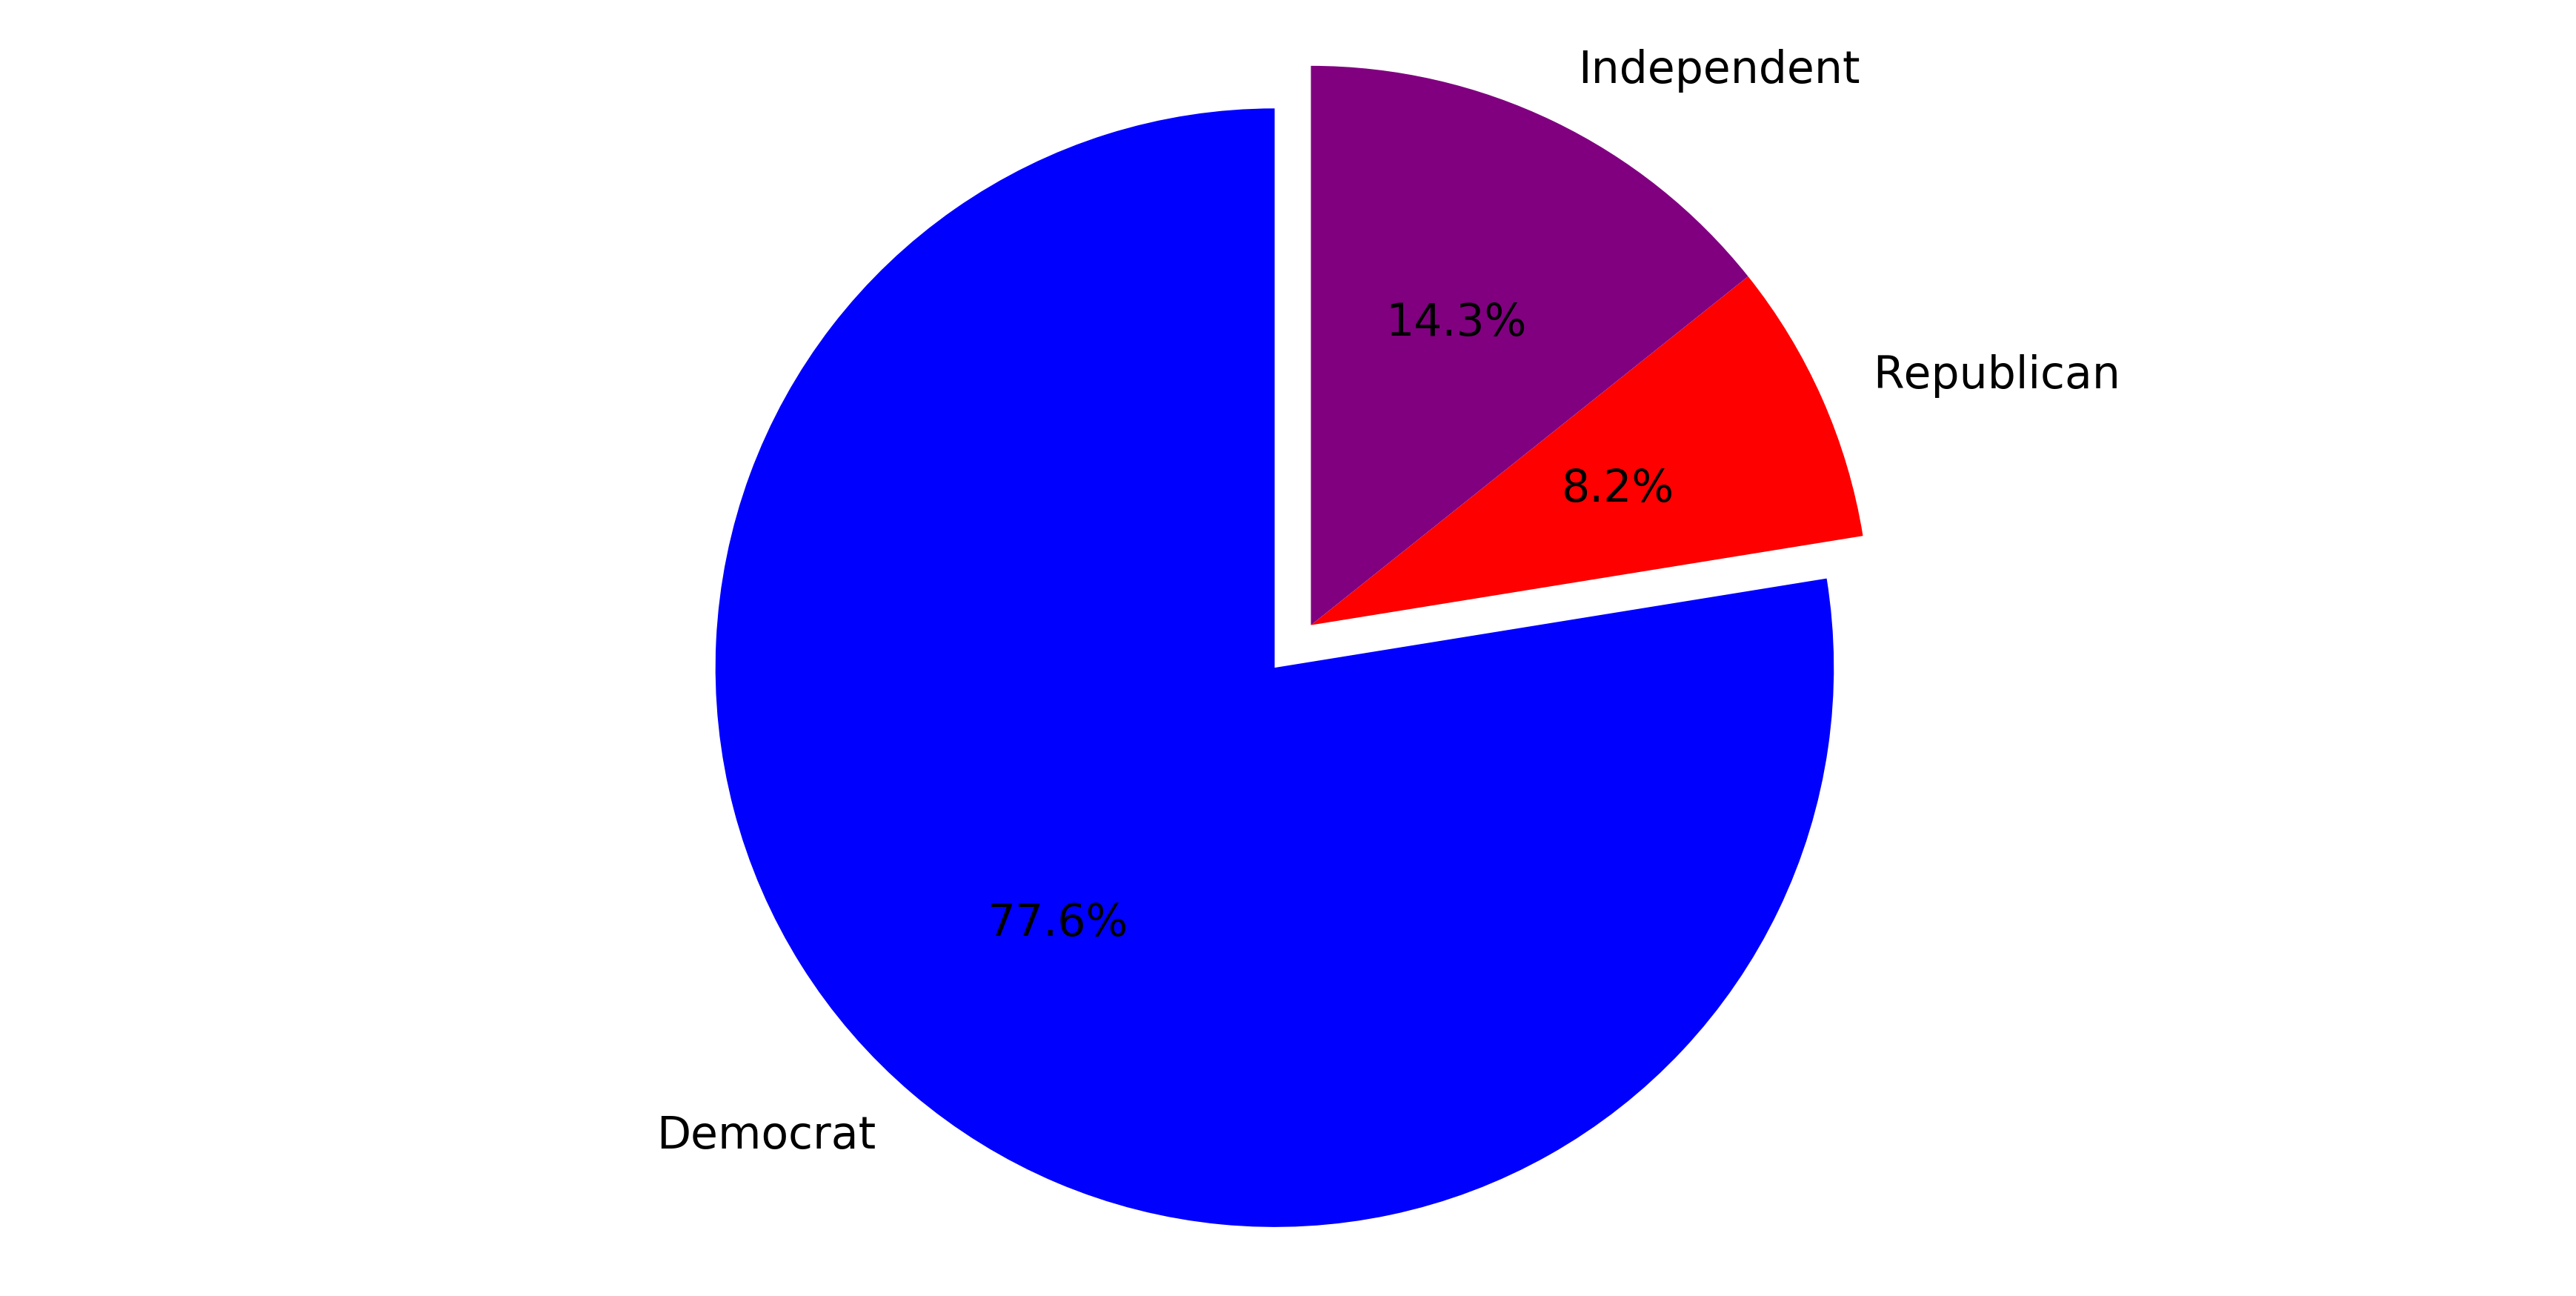

In [21]:
### PIE CHART FOR PARTY REPRESENTATION
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'comic-sans',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = 'Democrat', 'Republican', 'Independent'
sizes = [numDems, numReps, numInds]
colors = ['blue', 'red', 'purple']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

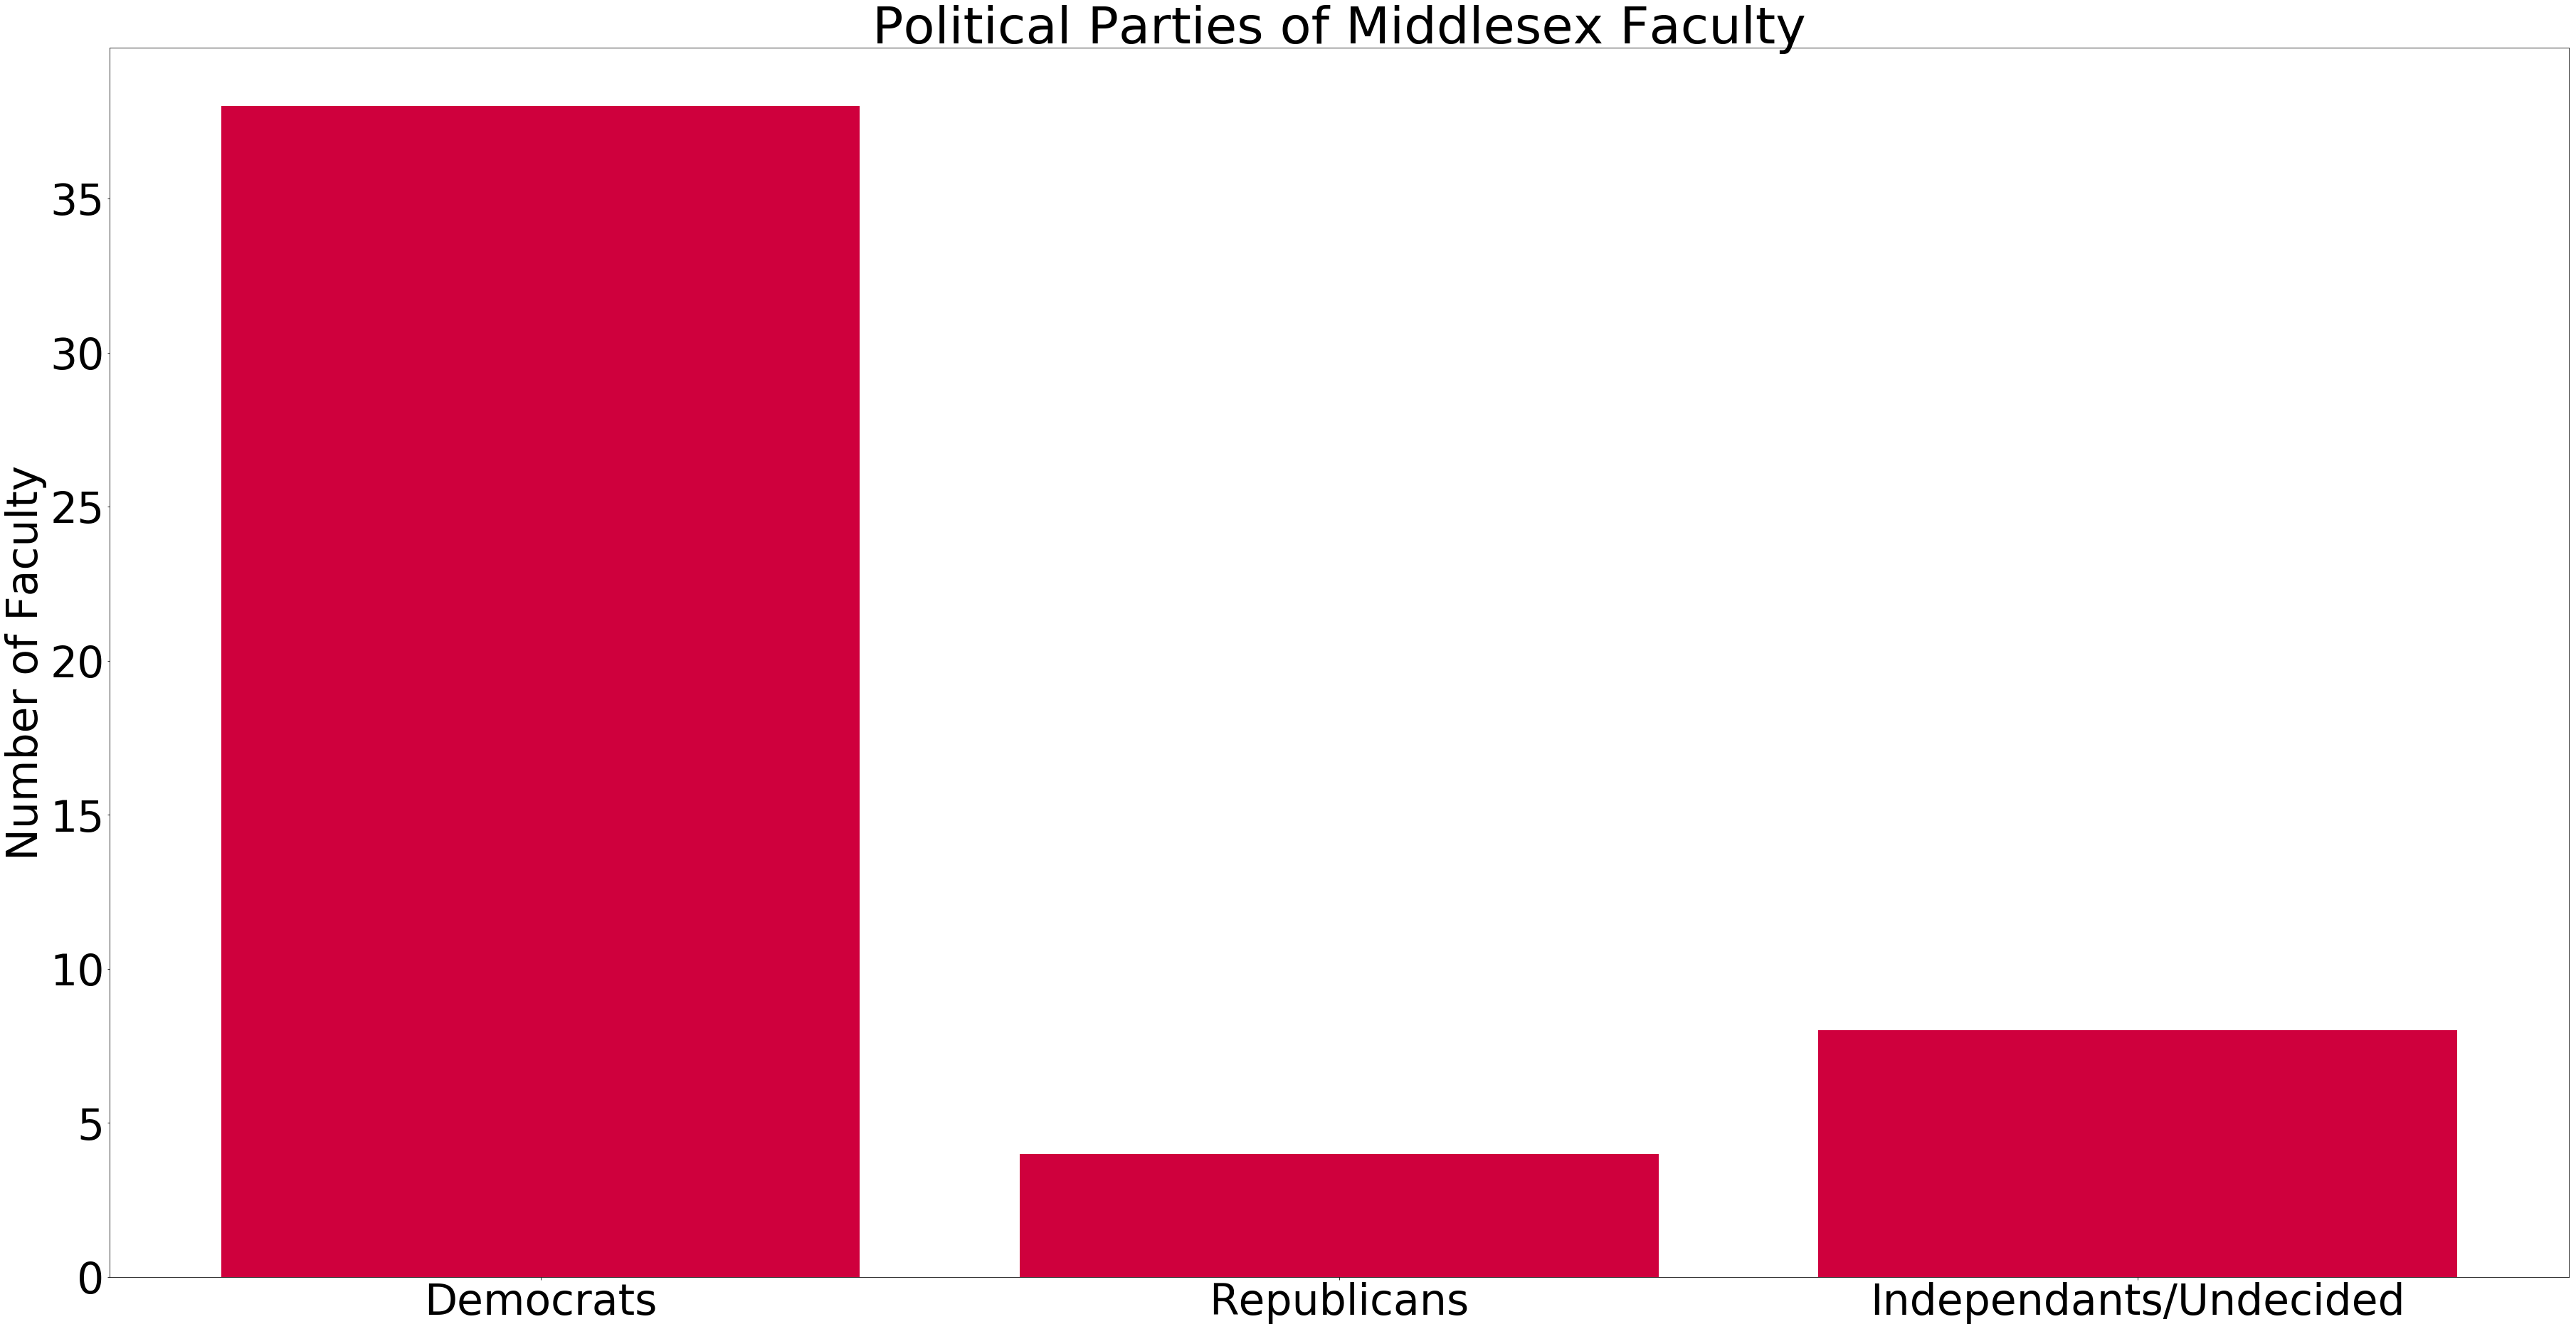

In [22]:
### BAR GRAPH FOR PARTY REPRESENTATION
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'comic-sans',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

objects = ('Democrats', 'Republicans', 'Independants/Undecided')
y_pos = np.arange(len(objects))
performance = [minidat['demCand']['Democrat'],minidat["Trump"]["Republican"],(minidat['Trump']['Independent']+minidat['demCand']['Independent'])]

plt.bar(y_pos, performance, align='center', alpha=1, color ="#cf003d")
plt.xticks(y_pos, objects)
plt.ylabel('Number of Faculty')
plt.title('Political Parties of Middlesex Faculty')

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.patches.Wedge object at 0x1a322f5400>, <matplotlib.patches.Wedge object at 0x1a322f5b38>, <matplotlib.patches.Wedge object at 0x1a322ff278>, <matplotlib.patches.Wedge object at 0x1a322ff978>, <matplotlib.patches.Wedge object at 0x1a323080b8>, <matplotlib.patches.Wedge object at 0x1a323087b8>, <matplotlib.patches.Wedge object at 0x1a32308eb8>, <matplotlib.patches.Wedge object at 0x1a323125f8>, <matplotlib.patches.Wedge object at 0x1a32312cf8>, <matplotlib.patches.Wedge object at 0x1a3231b438>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [Text(0.11498130276606913, 1.0939740856227893, 'Elizabeth Warren'), Text

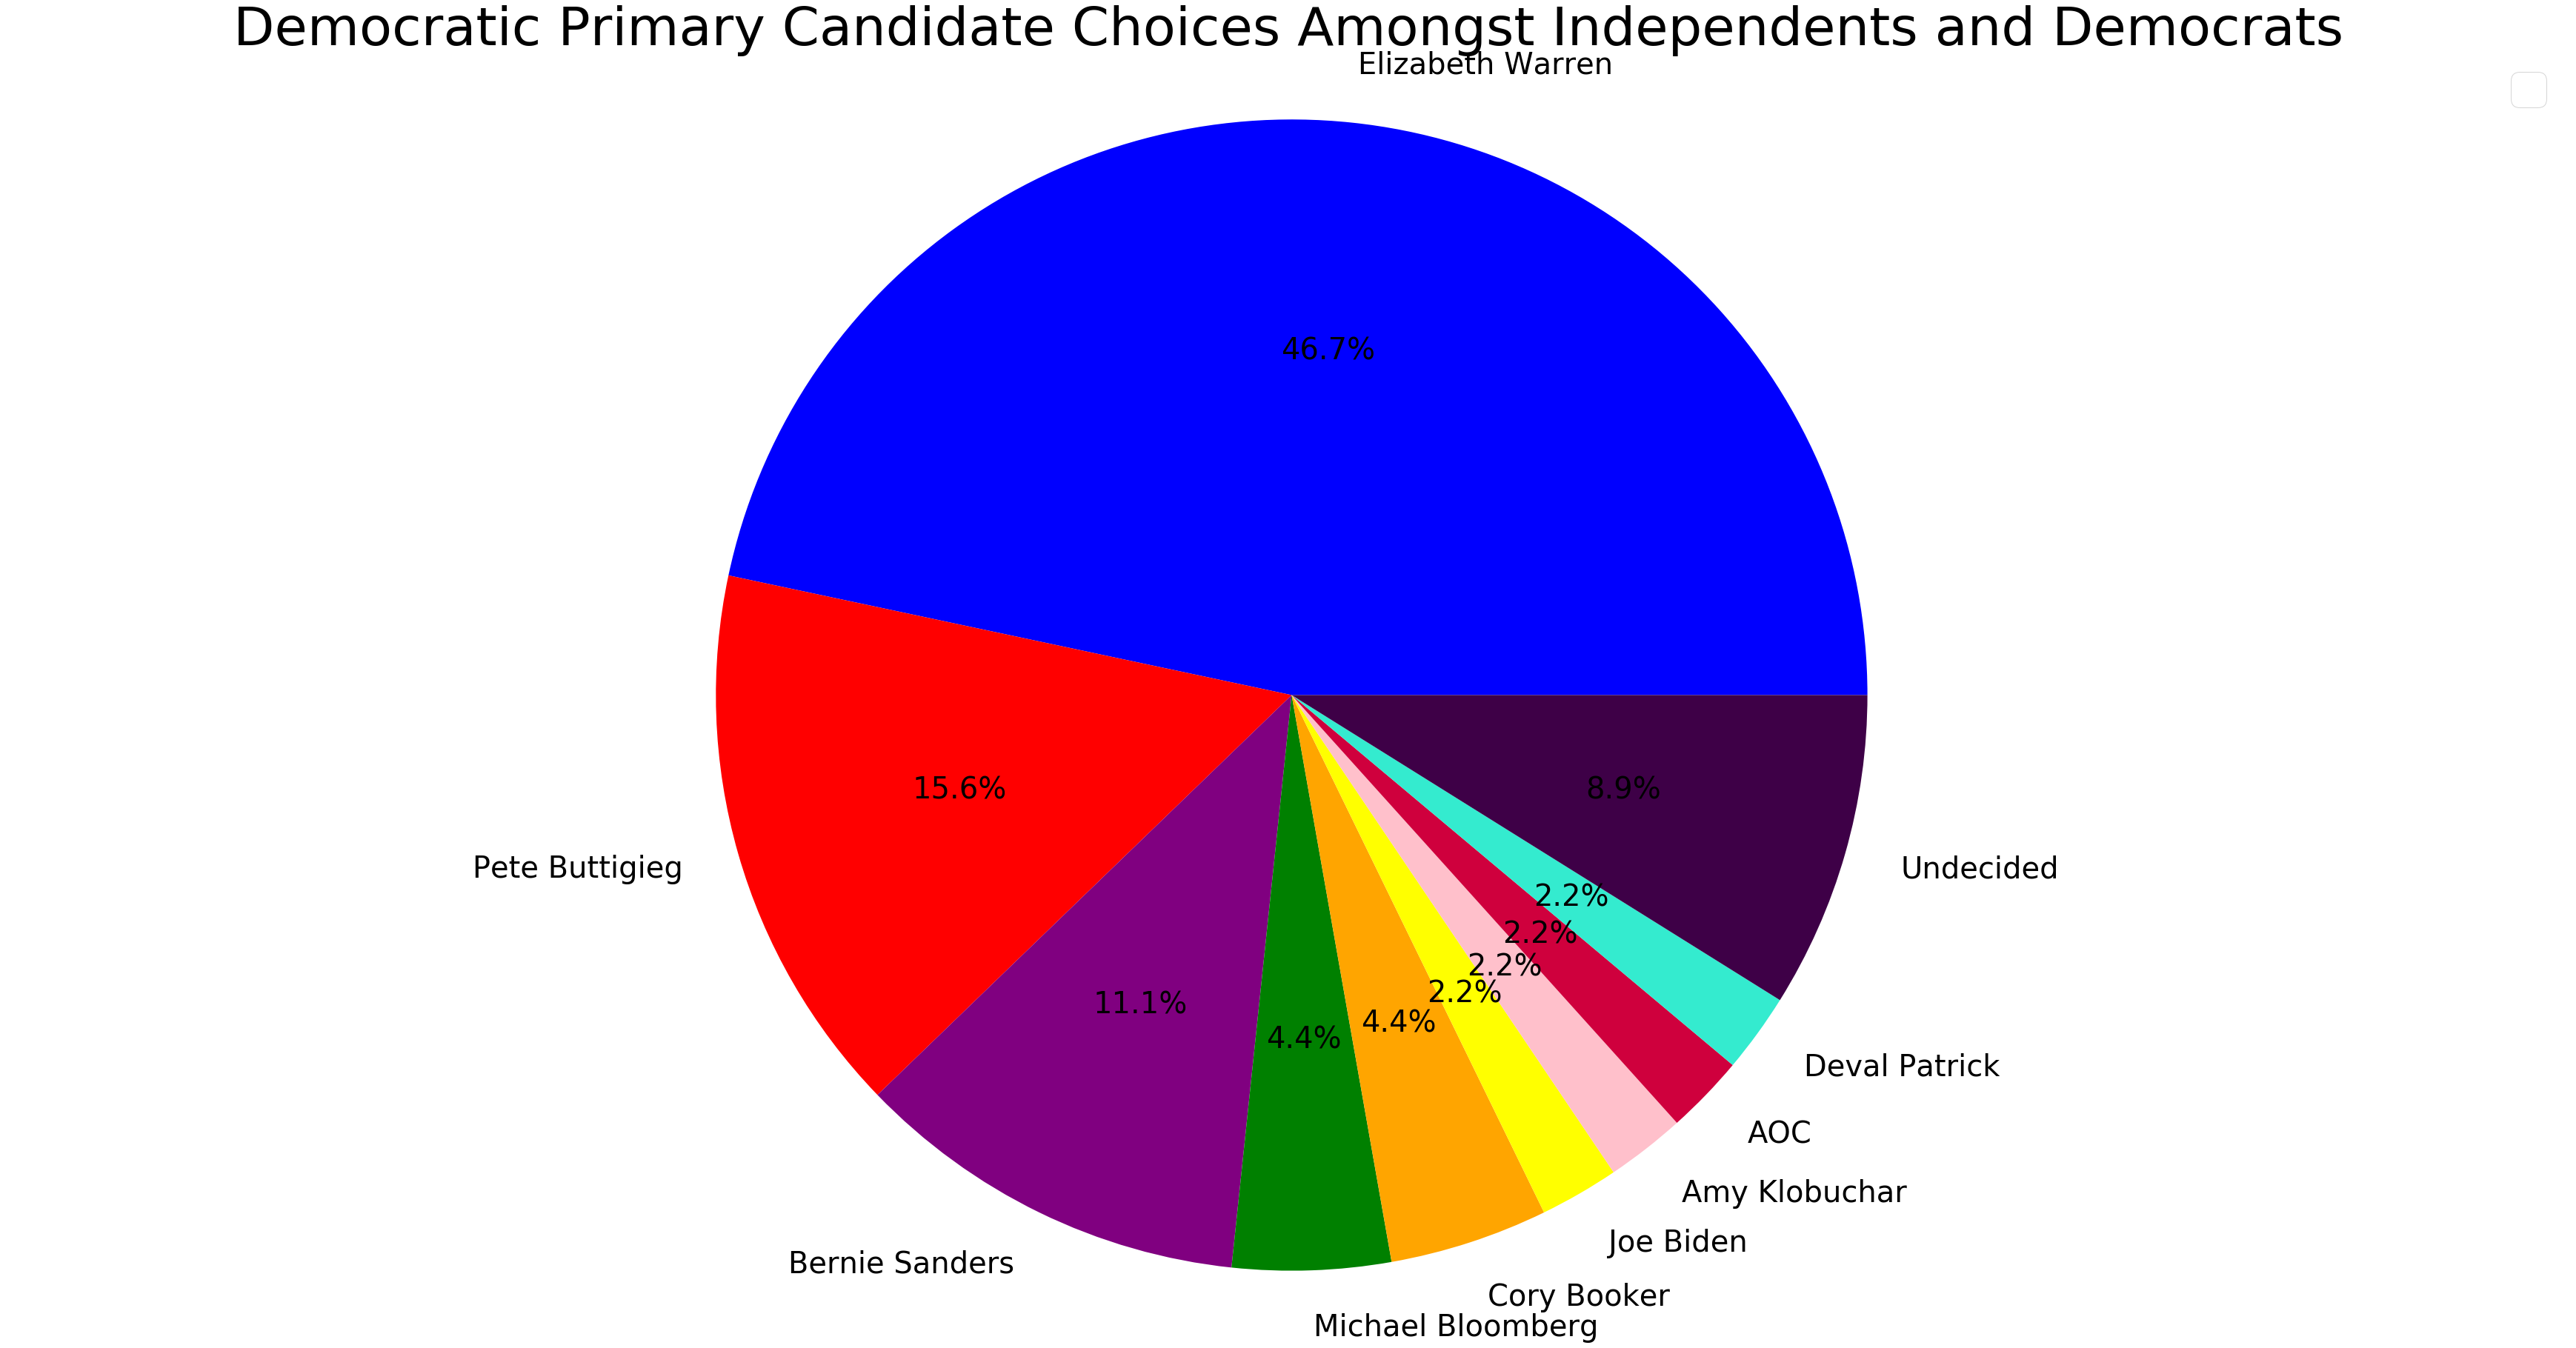

In [24]:
### PIE CHART FOR DEMOCRATIC CANDIDATES
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'times',
        'weight' : 'light',
        'size'   : 40}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = 'Elizabeth Warren', 'Pete Buttigieg', 'Bernie Sanders', 'Michael Bloomberg', 'Cory Booker','Joe Biden','Amy Klobuchar','AOC','Deval Patrick','Undecided'
sizes = [ew, pb, bs,mb,cb,jb,ak,aoc,dp,undecided]
colors = ['blue', 'red', 'purple','green','orange','yellow','pink','#cf003d','#34ebcf','#3e0047']

# Plot
patches = plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=0)

font = {'family' : 'times',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)


plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.title('Democratic Primary Candidate Choices Amongst Independents and Democrats')
print()
plt.axis('equal')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


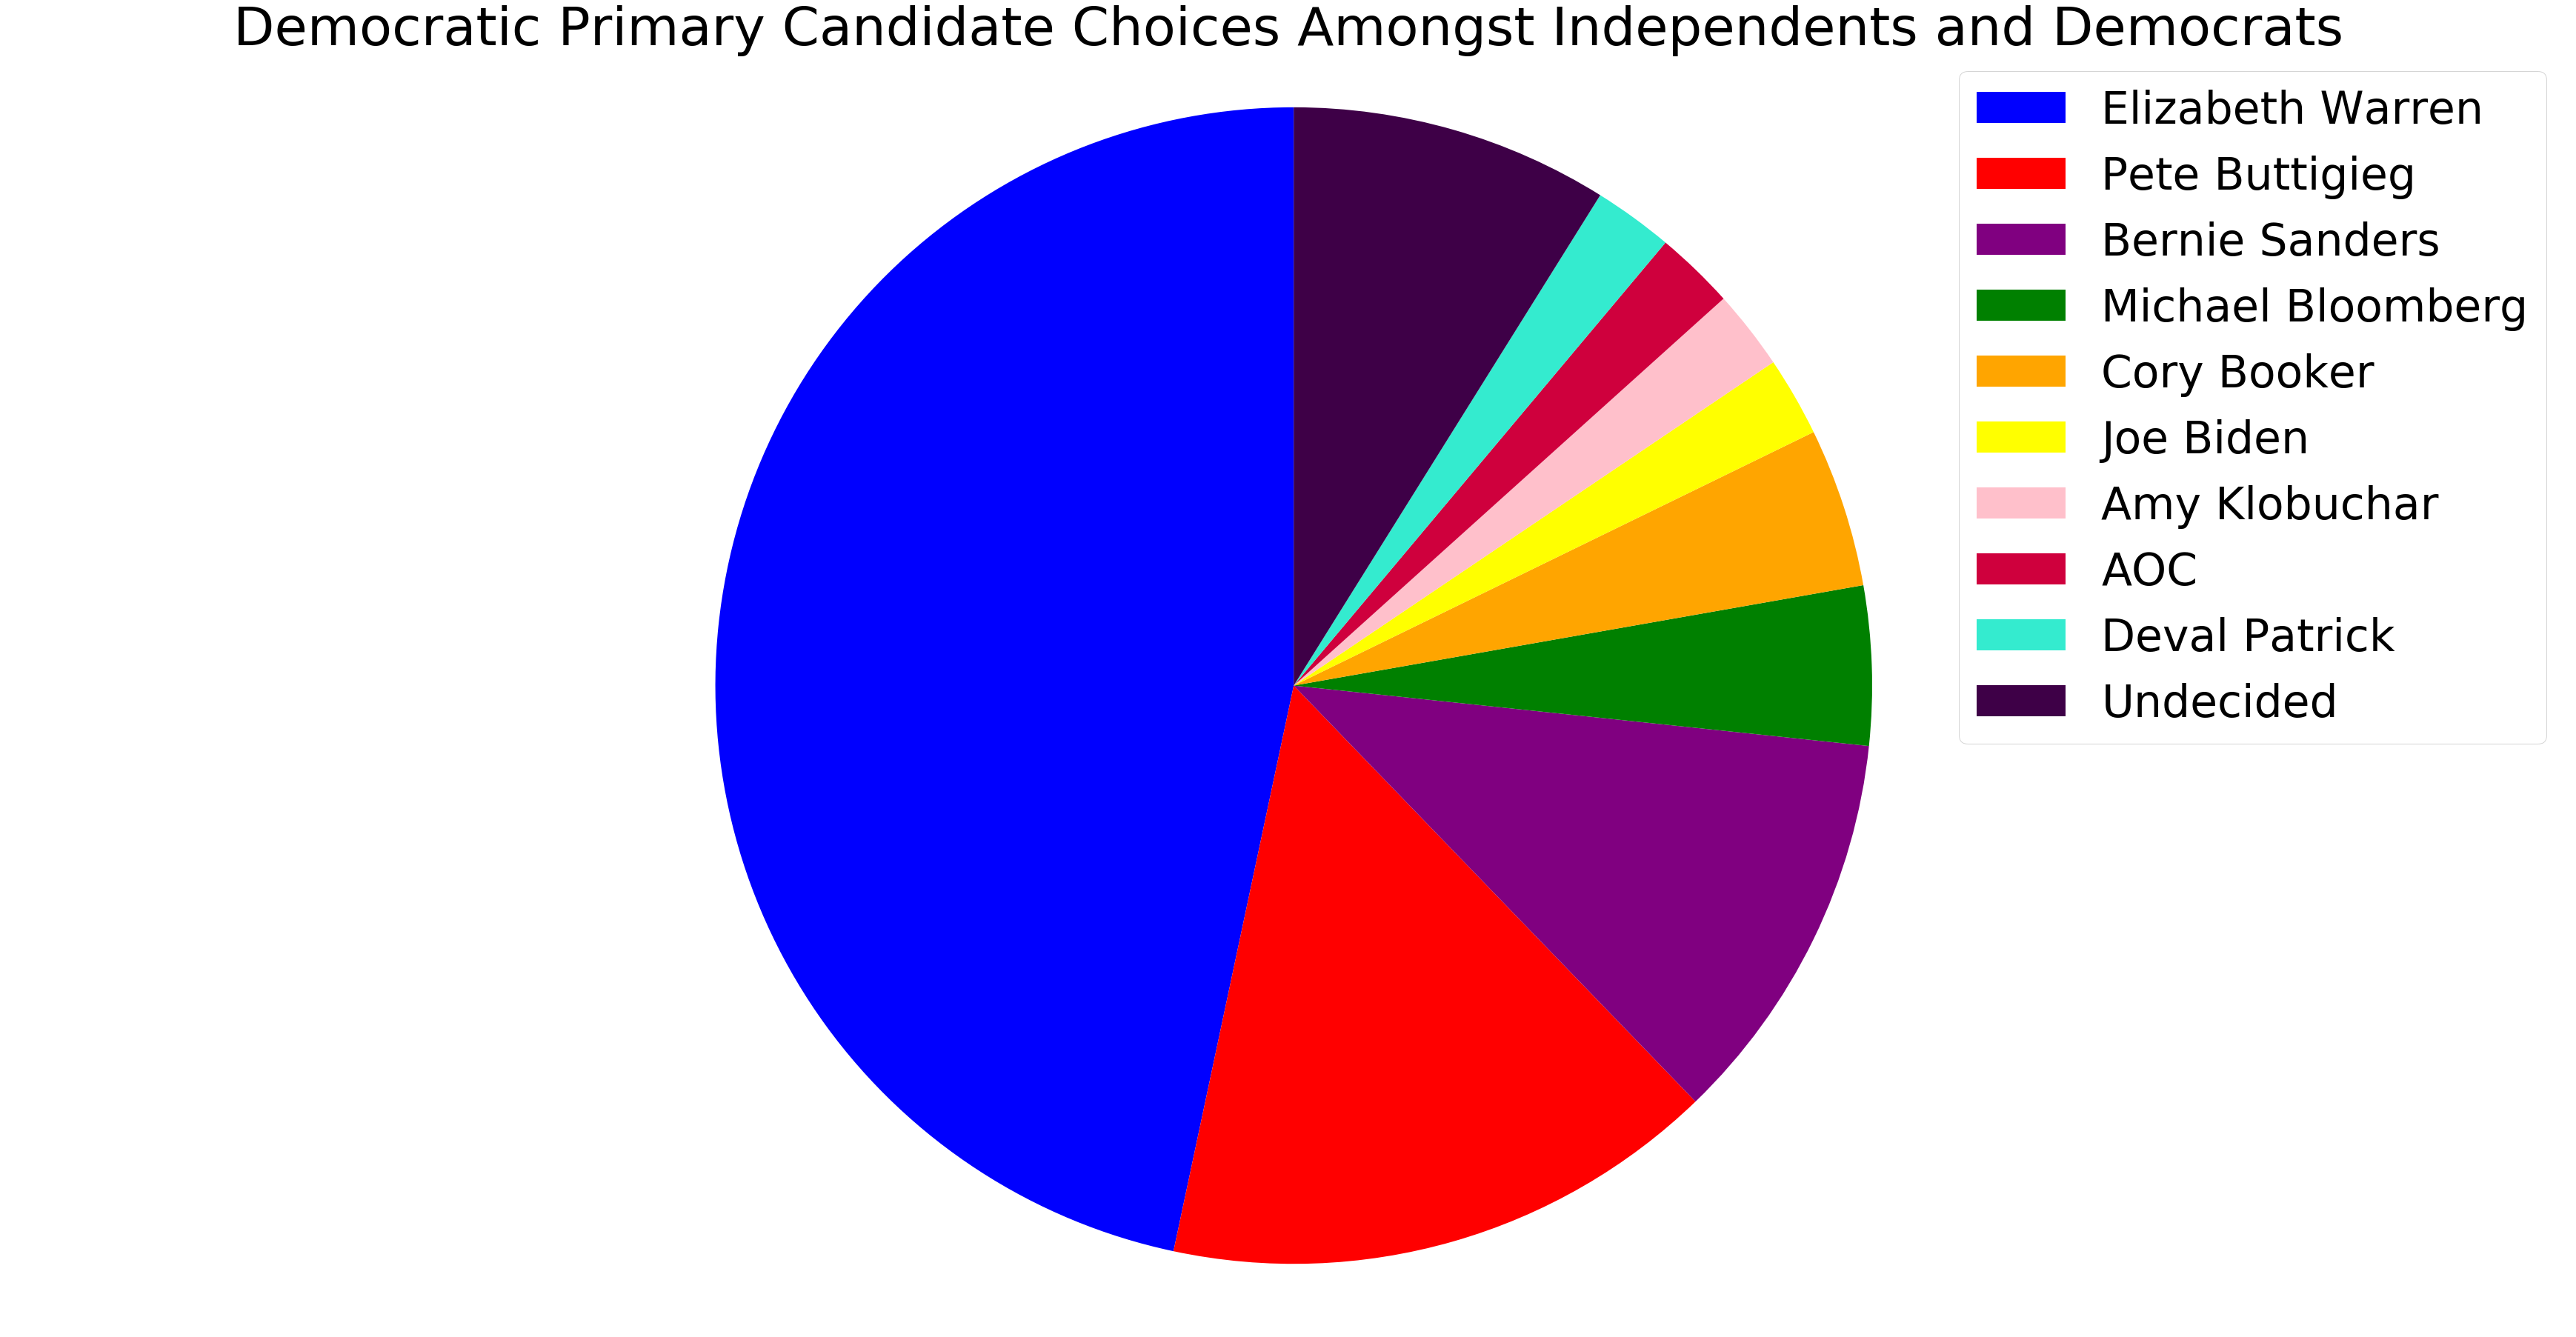

In [25]:
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'times',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = 'Elizabeth Warren', 'Pete Buttigieg', 'Bernie Sanders', 'Michael Bloomberg', 'Cory Booker','Joe Biden','Amy Klobuchar','AOC','Deval Patrick','Undecided'
sizes = [ew, pb, bs,mb,cb,jb,ak,aoc,dp,undecided]
colors = ['blue', 'red', 'purple','green','orange','yellow','pink','#cf003d','#34ebcf','#3e0047']

patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Democratic Primary Candidate Choices Amongst Independents and Democrats')

plt.axis('equal')
plt.tight_layout()
plt.show()

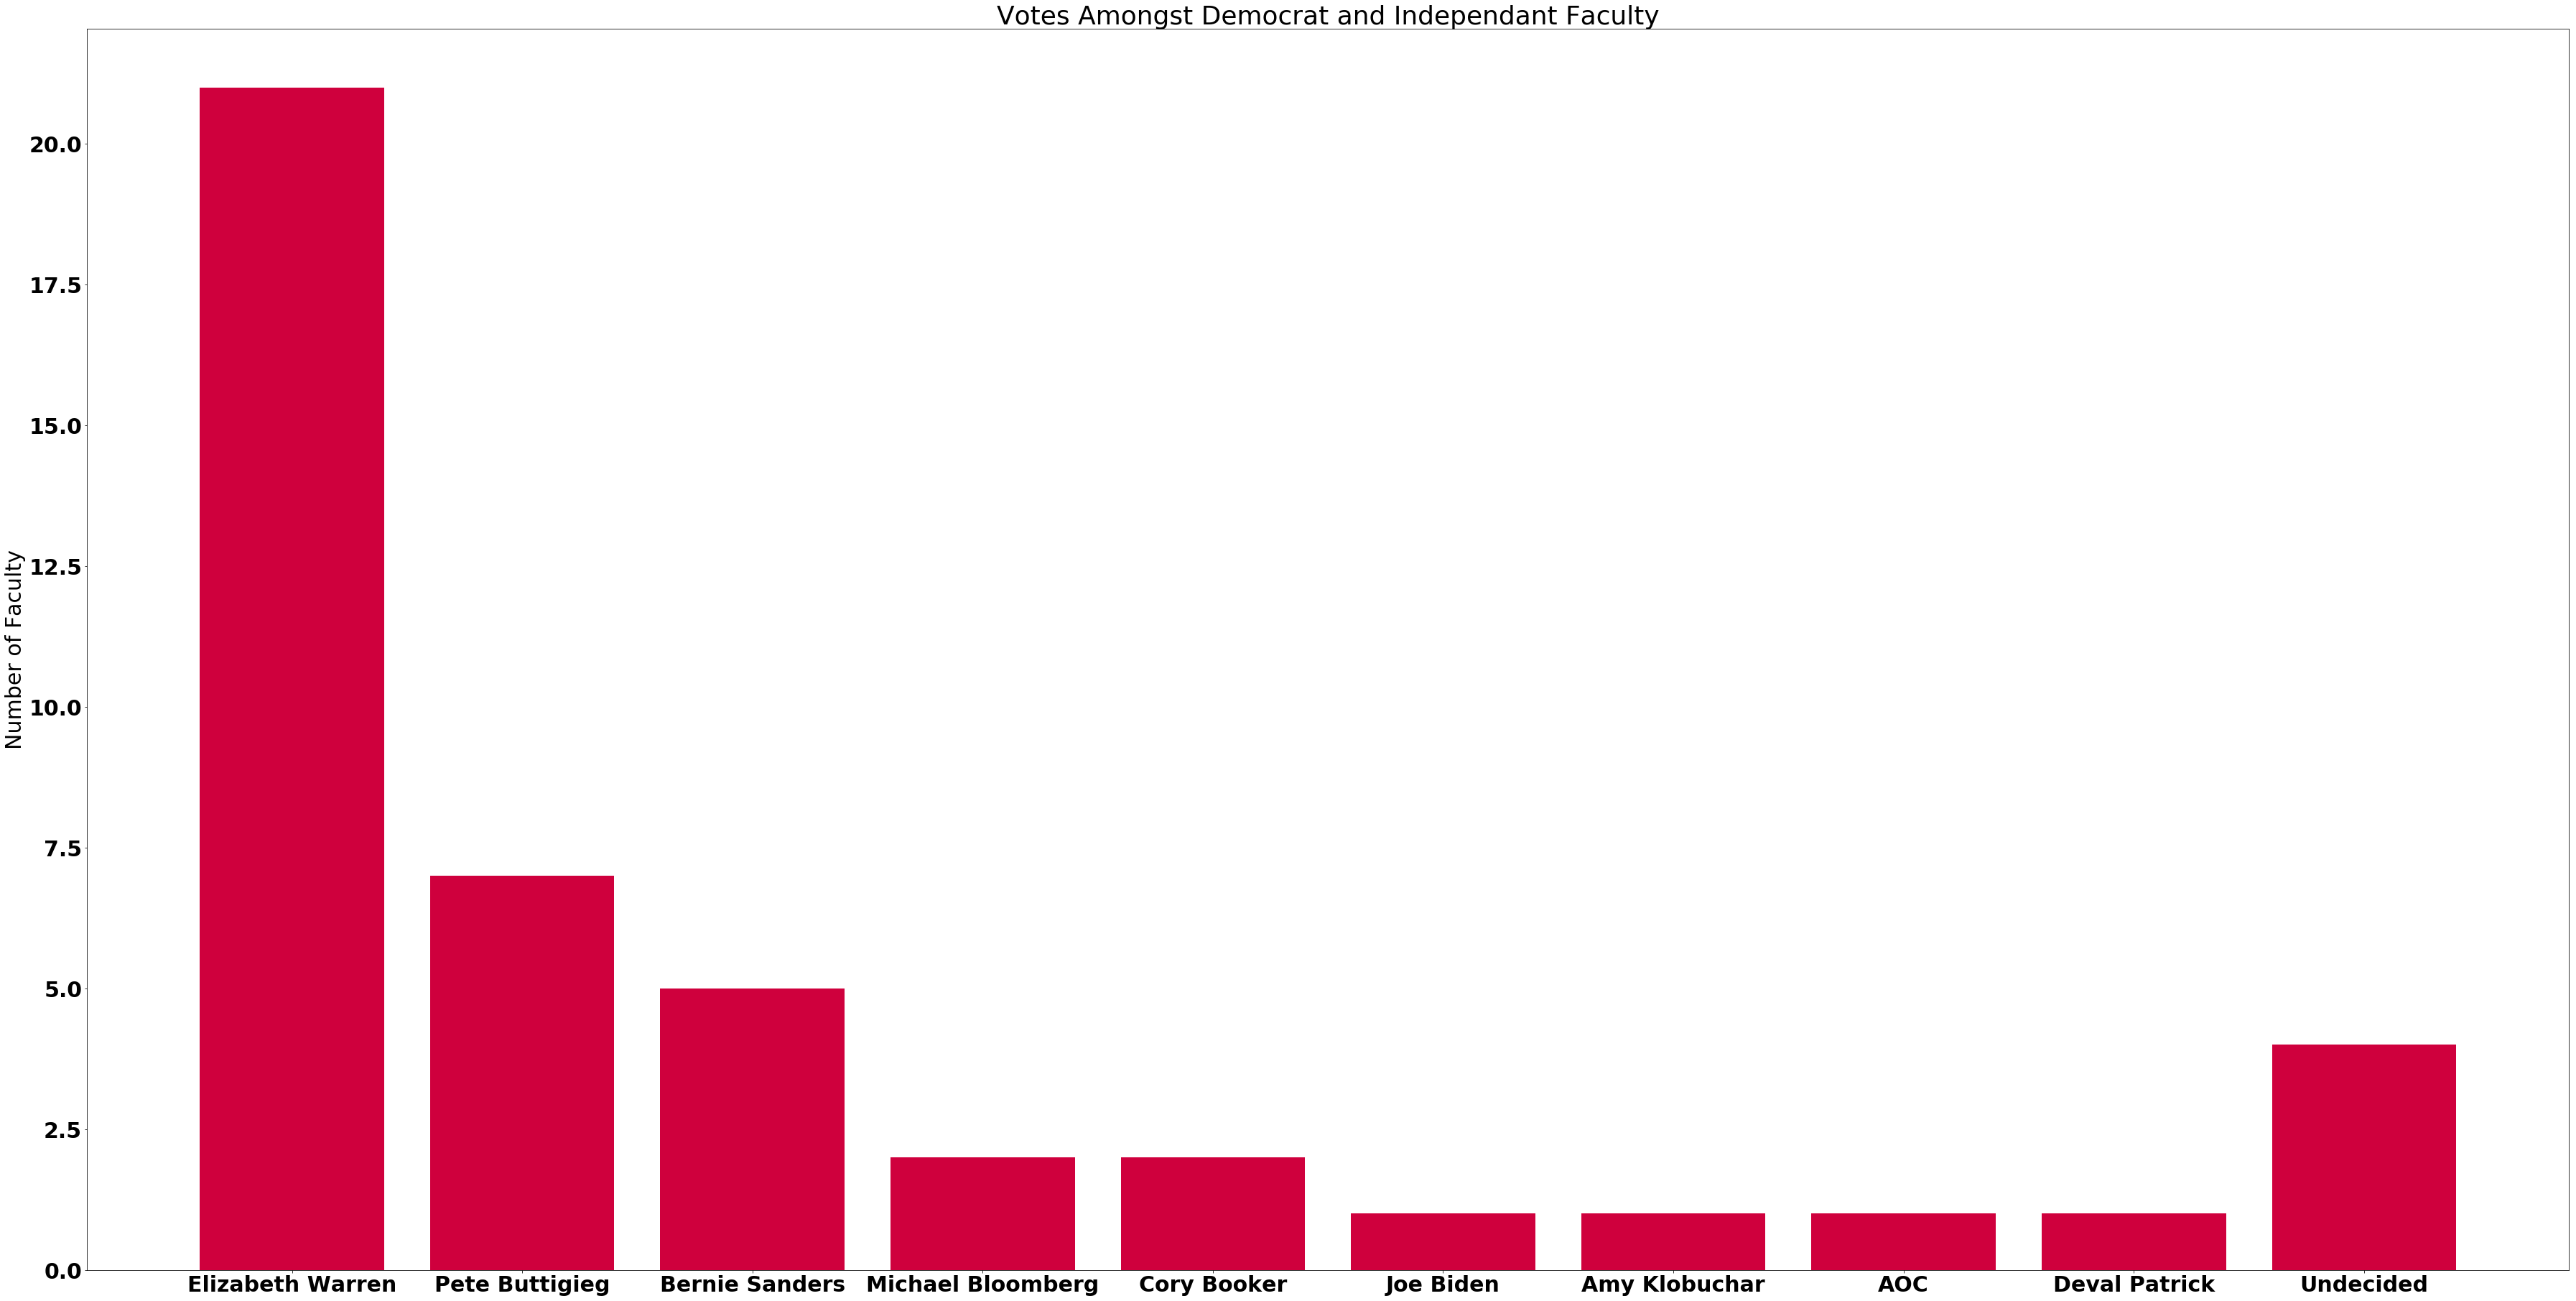

In [26]:
objects = ('Elizabeth Warren', 'Pete Buttigieg', 'Bernie Sanders', 'Michael Bloomberg', 'Cory Booker','Joe Biden','Amy Klobuchar','AOC','Deval Patrick','Undecided')
y_pos = np.arange(len(objects))

fig= plt.figure(figsize=(60,30))

font = {'family' : 'times',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

axes= fig.add_axes([0.1,0.1,0.8,0.8])
performance = [minidata['party']['Elizabeth Warren'],
               minidata['party']['Pete Buttigieg'],
                minidata['party']['Bernie Sanders'],
               minidata['party']['Michael Bloomberg'],
               minidata['party']['Cory Booker'],
               minidata['party']['Joe Biden'],
               minidata['party']['Amy Klobuchar'],
               minidata['party']['Alexandria Ocasio-Cortez'],
               minidata['party']['Deval Patrick'],
               minidata['party']['Undecided']]

plt.bar(y_pos, performance, align='center', alpha=1, color ="#cf003d")
plt.xticks(y_pos, objects)
plt.ylabel('Number of Faculty')
plt.title('Votes Amongst Democrat and Independant Faculty')

plt.show()

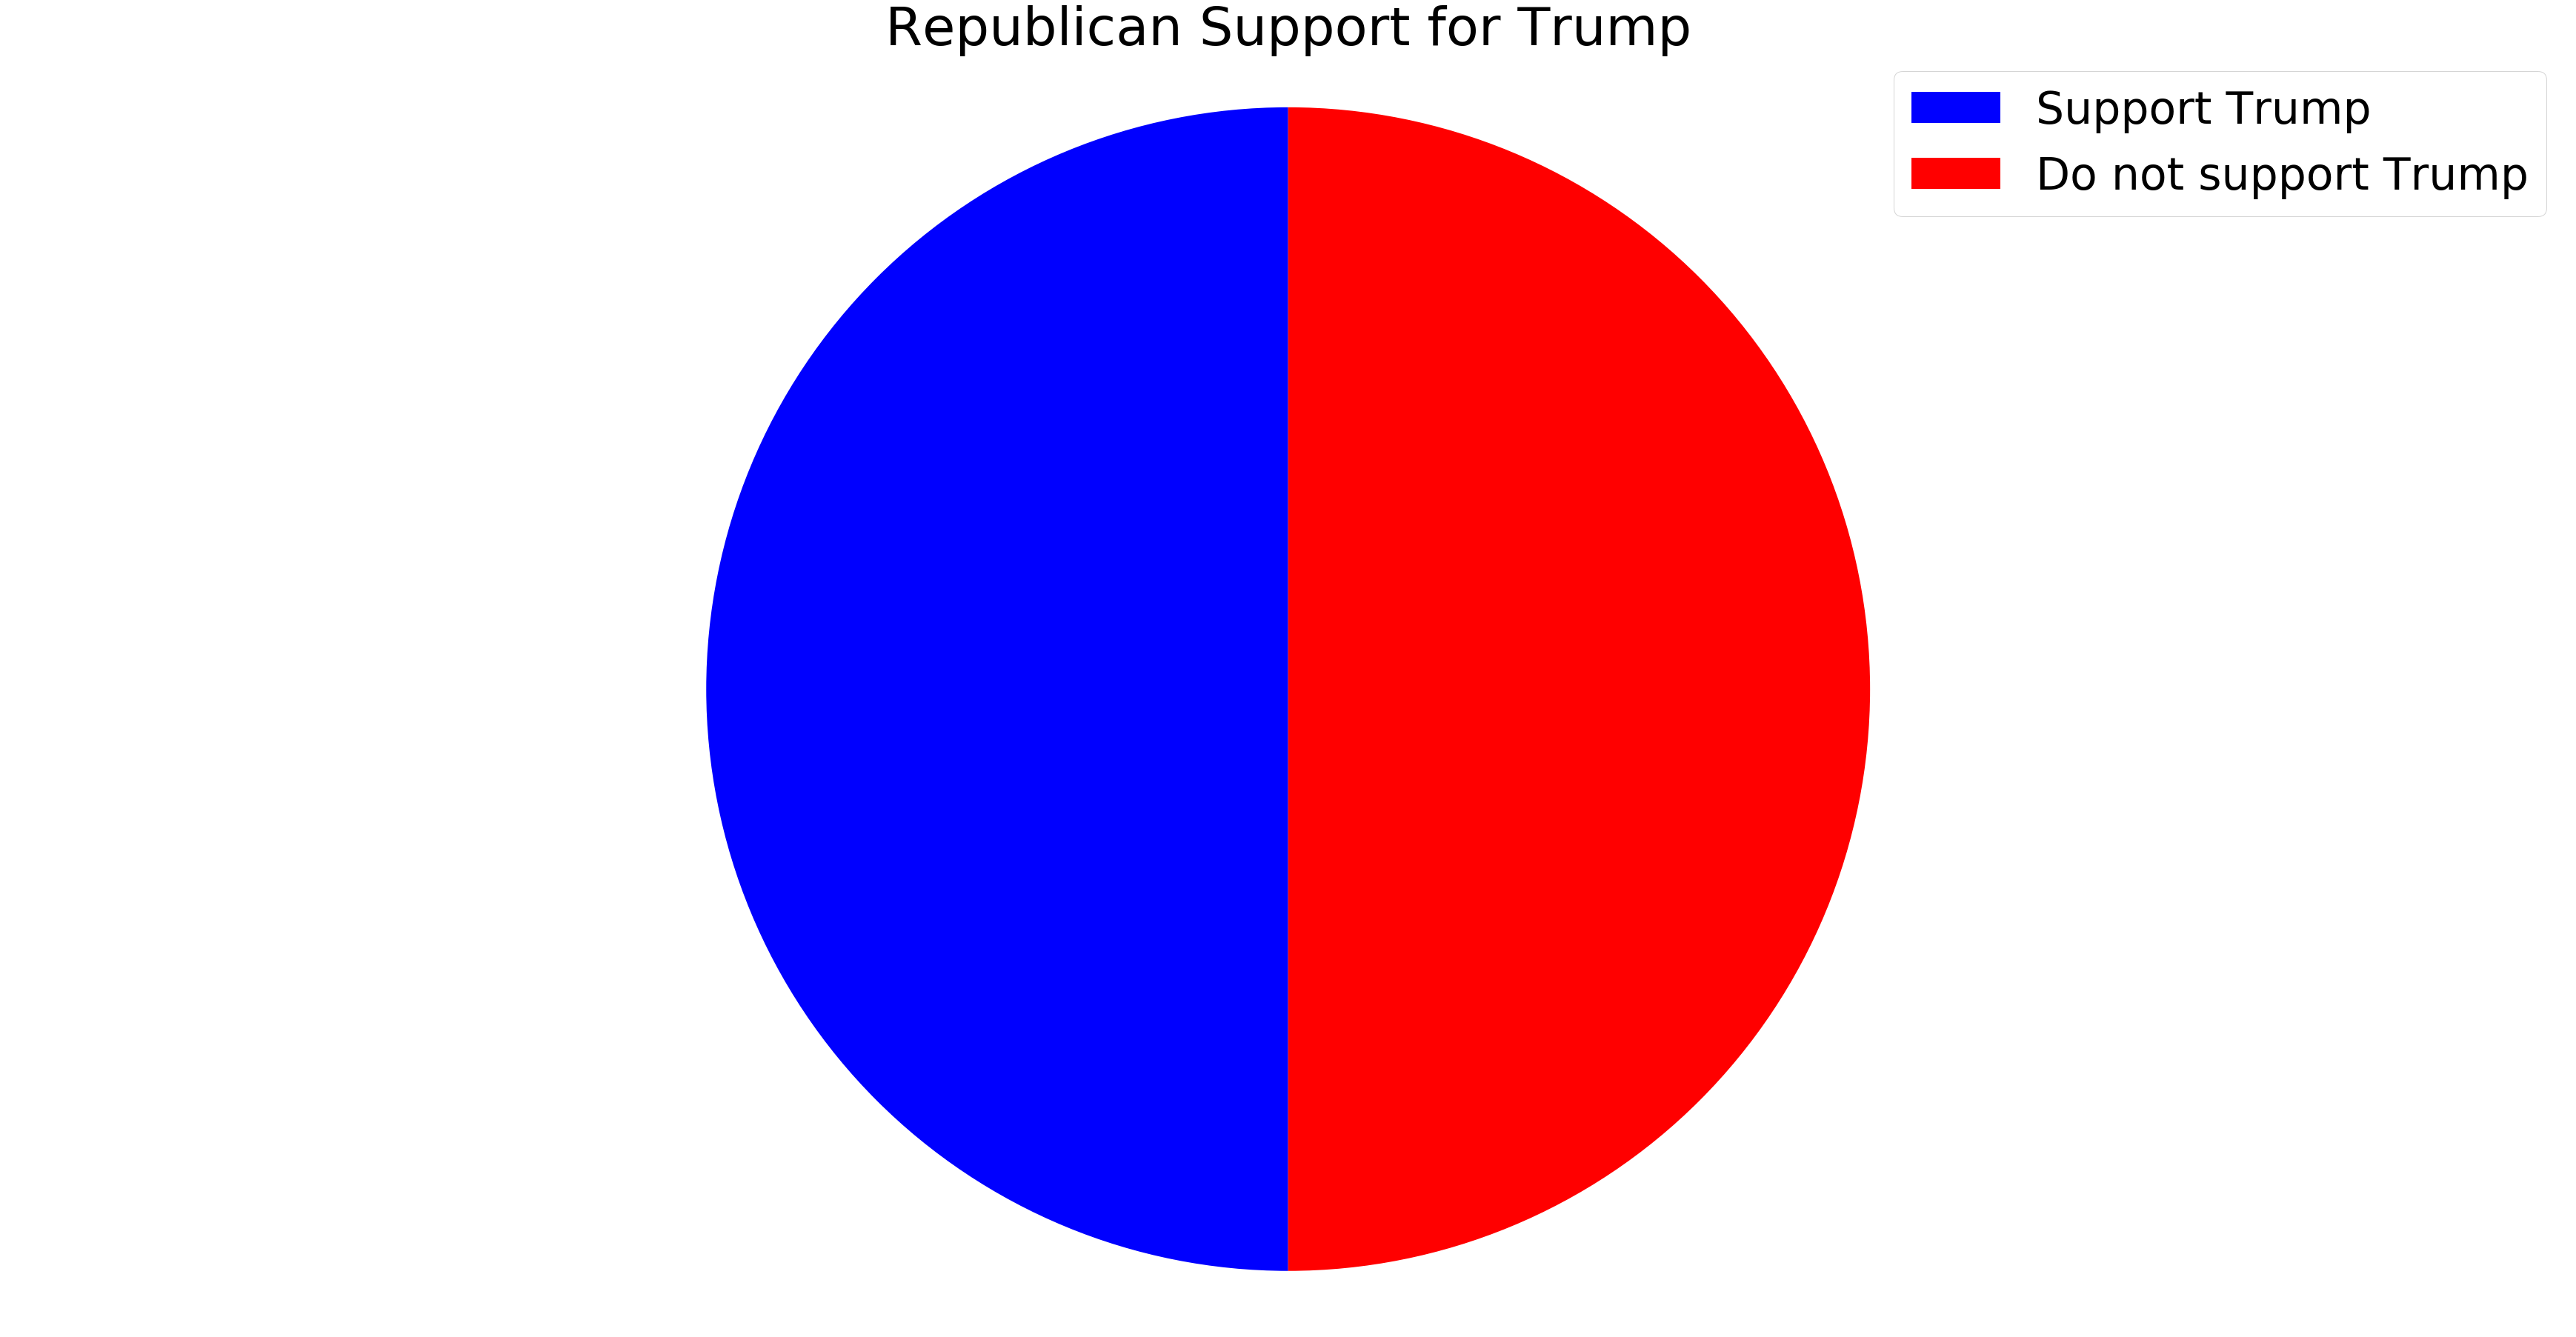

In [27]:
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'times',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = "Support Trump","Do not support Trump"
sizes = [trump['party'][1],trump['party'][0]]
colors = ['blue', 'red']

patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Republican Support for Trump')

plt.axis('equal')
plt.show()